# Conv2D Classification Model

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from cv2 import imread,imshow
from skimage import transform
import cv2
%matplotlib inline

In [2]:
labels=list()
training_path='DATASET/Marked_train/'
testing_path='DATASET/Marked_test/'
os.listdir(training_path)
for i in os.listdir(training_path):
    labels.append(i)

In [3]:
def total_sample_count(path):
    Total_sample=0
    for i in os.listdir(training_path):
        print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
        Total_sample+=len(os.listdir(os.path.join(path,i)))
    print(f'Total Samples:{Total_sample}')

In [4]:
total_sample_count(training_path)

Length of :downdog= 199
Length of :goddess= 172
Length of :plank= 263
Length of :tree= 157
Length of :warrior2= 249
Total Samples:1040


In [5]:
total_sample_count(testing_path)

Length of :downdog= 94
Length of :goddess= 80
Length of :plank= 115
Length of :tree= 69
Length of :warrior2= 107
Total Samples:465


In [45]:
# #image after scaling n resizing
# plt.imshow(X[601])
# plt.title(labels[Y[601]])
# plt.show()

## Spliting Dataset Into Training And Testing

In [7]:
from tqdm import tqdm
from sklearn.utils import shuffle

def image_xy_label(path):
    X=[] 
    Y=[]
    i=0
    for idx,img in enumerate(os.listdir(path)):
        for img_name in tqdm(os.listdir(path+img)):
            if i<300:
                img_file=imread(path+img+'/'+img_name)
                if img_file is not None:
#                     img_file=transform.resize(img_file,(75,75,3))
                    X.append(img_file)
                    Y.append(idx)
            else:
                break
            i=i+1
        i=0
    X=np.asarray(X)  
    Y=np.asarray(Y)  
    return shuffle(X, Y, random_state=0)

In [8]:
X_train, y_train = image_xy_label(training_path)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:05<00:00, 49.38it/s]


In [9]:
X_test, y_test = image_xy_label(testing_path)

100%|████████████████████████████████████████████████████████████████████████████████| 107/107 [00:02<00:00, 38.81it/s]


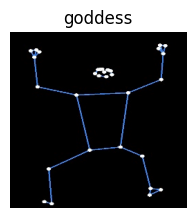

In [10]:
plt.figure(figsize=[5,5])
i_no = 510
plt.subplot(121);plt.imshow(X_train[i_no]);plt.title(labels[y_train[i_no]]);plt.axis('off');

## OneHot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=len(labels))
y_test=to_categorical(y_test,num_classes=len(labels))

In [12]:
print(f'After preprocessing, our dataset has {X_train.shape[0]} images with shape {X_train.shape[1:]}')
print(f'After preprocessing, our dataset has {y_train.shape[0]} rows with {y_train.shape[1]} labels')

After preprocessing, our dataset has 1040 images with shape (256, 256, 3)
After preprocessing, our dataset has 1040 rows with 5 labels


## AiFit Conv2D Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, RandomFlip, RandomRotation, Dropout, Rescaling
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
model=Sequential()
model.add(tf.keras.Input(shape=X_train.shape[1:]))
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.1))
model.add(Rescaling(1.0 / 255))

model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))


model.add(Flatten())
model.add(Dense(64,activation='relu', kernel_rekgularizer=regularizers.l2(0.001)))
model.add(Dropout(.5))
model.add(Dense(len(labels),activation='softmax'))
model._name = 'aifitconv_2d'
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])

In [15]:
model.summary()

Model: "aifitconv_2d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)     

## Training Model

In [16]:
from time import time
tic=time()
epoch=100
history=model.fit(X_train,y_train,validation_split=0.2,epochs=epoch,batch_size=32, verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/100
26/26 [==============================] - 63s 2s/step - loss: 1.5504 - accuracy: 0.3534 - val_loss: 1.3161 - val_accuracy: 0.5240
Epoch 2/100
26/26 [==============================] - 53s 2s/step - loss: 1.3744 - accuracy: 0.4760 - val_loss: 1.2759 - val_accuracy: 0.6154
Epoch 3/100
26/26 [==============================] - 56s 2s/step - loss: 1.2706 - accuracy: 0.5685 - val_loss: 1.1405 - val_accuracy: 0.6346
Epoch 4/100
26/26 [==============================] - 56s 2s/step - loss: 1.2036 - accuracy: 0.5986 - val_loss: 1.0927 - val_accuracy: 0.6683
Epoch 5/100
26/26 [==============================] - 56s 2s/step - loss: 1.1897 - accuracy: 0.5998 - val_loss: 1.1020 - val_accuracy: 0.6587
Epoch 6/100
26/26 [==============================] - 59s 2s/step - loss: 1.1470 - accuracy: 0.6418 - val_loss: 1.0157 - val_accuracy: 0.6779
Epoch 7/100
26/26 [==============================] - 55s 2s/step - loss: 1.0458 - accuracy: 0.6851 - val_loss: 0.9818 - val_accuracy: 0.6971
Epoch 8/100
2

## Testing and Evaluating Model

Text(0.5, 1.0, 'Loss evolution')

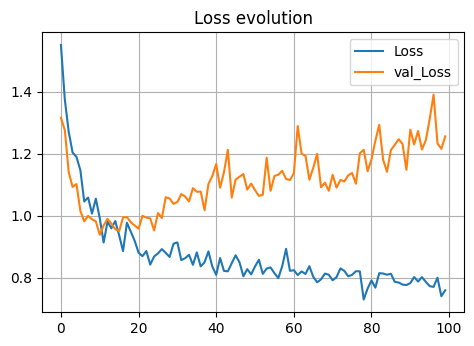

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

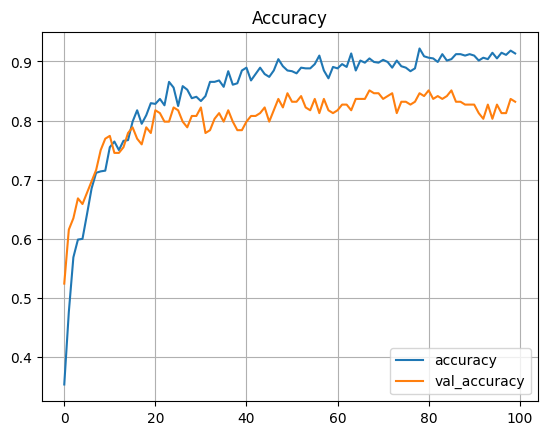

In [18]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [19]:
score=model.evaluate(X_test,y_test,verbose=1)

15/15 [==============================] - 3s 215ms/step - loss: 0.6962 - accuracy: 0.9419


In [38]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

15/15 [==============================] - 3s 197ms/step
[4 3 1 0 4 0 2 2 2 2 4 3 4 1 4 4 2 4 0 1 1 2 3 1 4 3 3 2 0 0 2 2 1 3 0 0 1
 2 4 2 2 2 4 2 2 3 2 2 0 0 4 2 3 4 2 0 0 2 3 3 3 1 4 0 3 0 0 0 1 4 0 1 1 4
 4 1 0 1 2 1 4 3 3 0 4 4 4 0 2 2 3 0 1 1 4 4 4 2 4 1 4 0 0 0 0 0 1 3 0 2 4
 2 2 0 4 2 4 2 3 0 2 4 0 0 4 0 1 3 0 3 2 0 4 2 0 4 2 3 4 4 3 4 4 0 4 2 3 3
 1 3 0 3 4 4 2 0 3 0 2 3 2 0 0 1 1 1 0 2 2 4 2 0 4 2 1 4 4 3 4 0 1 2 2 0 1
 4 1 3 4 2 2 1 1 4 1 2 1 4 2 1 2 3 2 1 2 2 4 3 3 1 0 4 1 0 0 1 0 0 1 2 1 2
 4 1 4 3 1 3 2 0 3 4 4 0 1 3 0 3 0 2 3 2 0 4 4 2 4 0 0 2 4 1 3 4 2 4 1 2 1
 3 4 3 2 4 2 2 2 2 2 0 0 2 2 1 1 1 4 4 0 2 4 0 4 3 0 4 4 2 1 0 4 4 3 1 1 0
 3 1 3 1 2 2 3 4 2 4 0 3 2 2 1 0 3 1 0 2 0 2 3 4 2 3 4 2 4 0 3 2 0 3 0 2 0
 4 0 0 2 0 2 1 4 4 1 2 0 3 1 2 0 0 0 2 4 1 3 3 4 2 2 4 4 1 4 1 0 3 0 3 2 2
 2 1 1 3 2 3 1 4 1 2 3 2 0 3 4 4 4 0 0 2 1 4 3 2 3 2 4 4 0 1 4 4 2 4 0 4 0
 4 1 3 0 2 4 1 1 2 2 0 0 2 2 4 2 4 4 1 2 4 2 1 3 3 2 2 1 4 2 0 3 0 1 3 4 2
 4 0 2 3 4 0 0 0 3 2 2 2 0 4 2 2 3 2 1 0 1]


In [21]:
from sklearn import metrics
y_test_a=np.argmax(y_test,axis=1)
print(metrics.confusion_matrix(y_test_a,y_pred))

[[ 92   0   2   0   0]
 [  0  70   2   2   6]
 [  5   0 110   0   0]
 [  0   0   2  67   0]
 [  0   5   1   2  99]]


In [22]:
print(metrics.classification_report(y_test_a,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.93      0.88      0.90        80
           2       0.94      0.96      0.95       115
           3       0.94      0.97      0.96        69
           4       0.94      0.93      0.93       107

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465



15/15 [==============================] - 3s 212ms/step


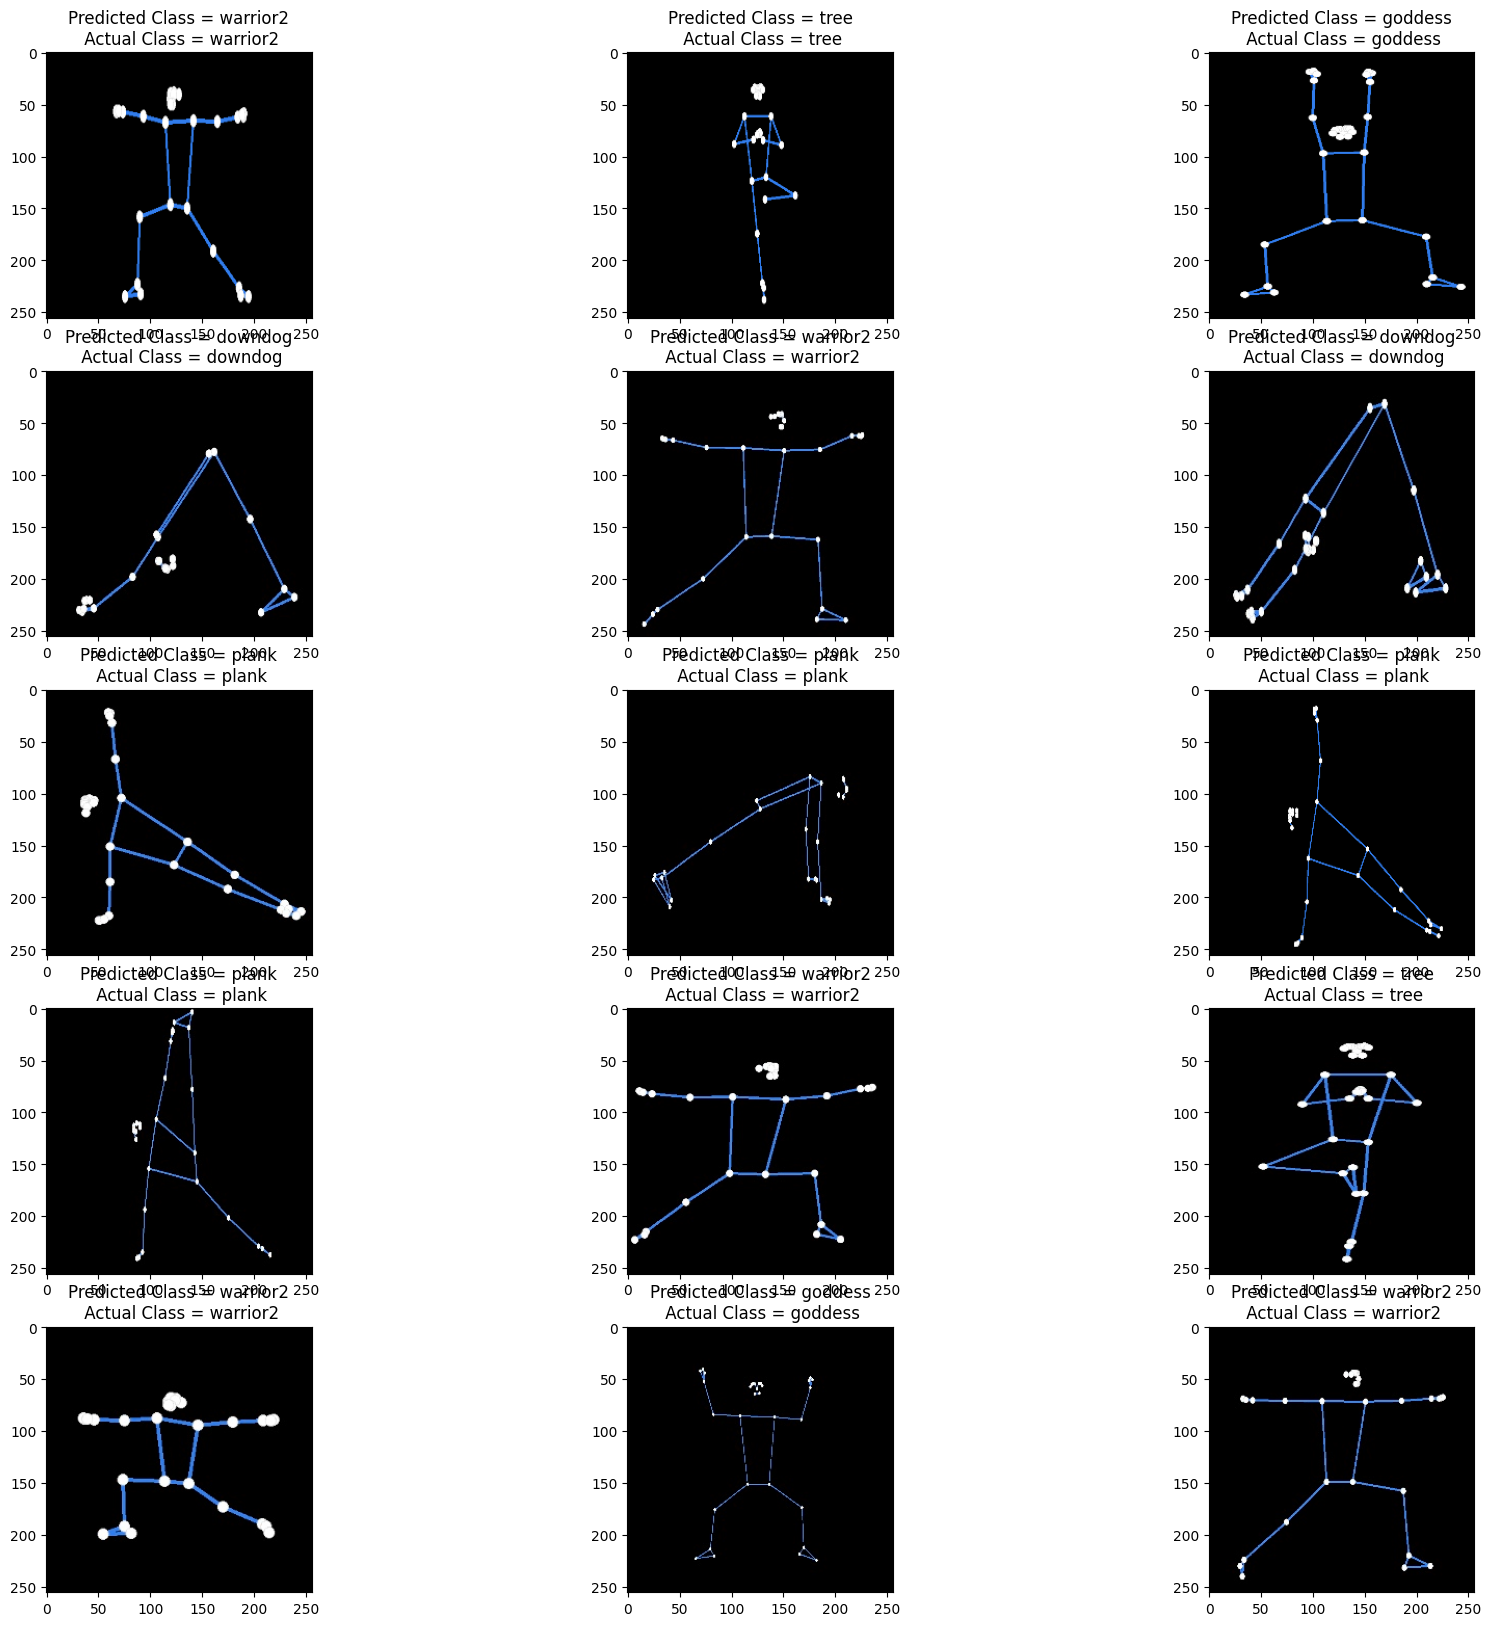

In [24]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=y_test_a
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [25]:
# model.save('aifit_conv2d.h5')